✅ Found local dataset.
Data Loaded. Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.0516 - mae: 0.6494 - val_loss: 0.9063 - val_mae: 0.6001
Epoch 2/5
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.9226 - mae: 0.5967 - val_loss: 0.8878 - val_mae: 0.5918
Epoch 3/5
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.9141 - mae: 0.5911 - val_loss: 0.8819 - val_mae: 0.5886
Epoch 4/5
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.8937 - mae: 0.5885 - val_loss: 0.8815 - val_mae: 0.5881
Epoch 5/5
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.8872 - mae: 0.5859 - val_loss: 0.8761 - val_mae: 0.5850
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


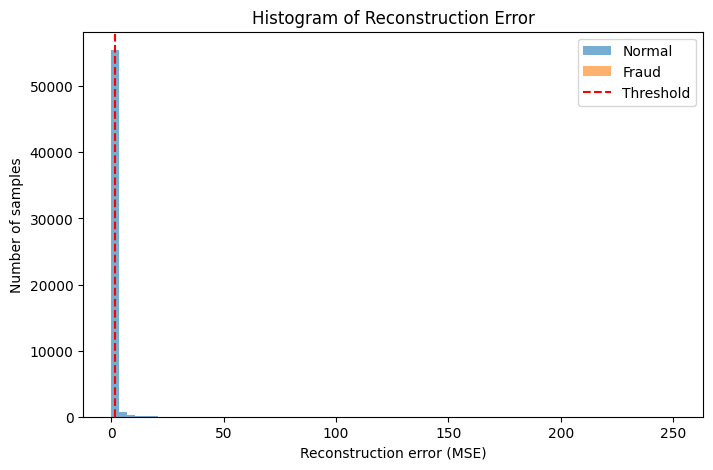

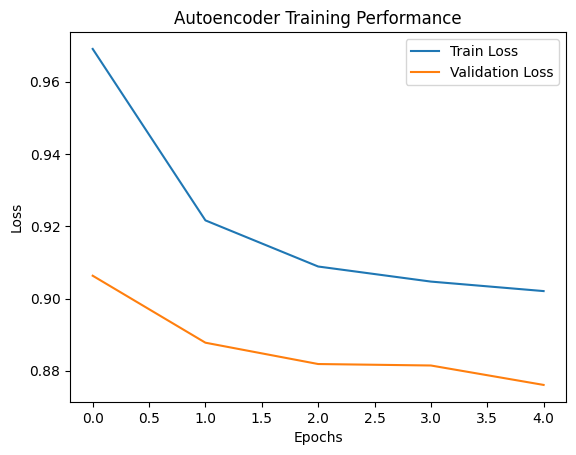

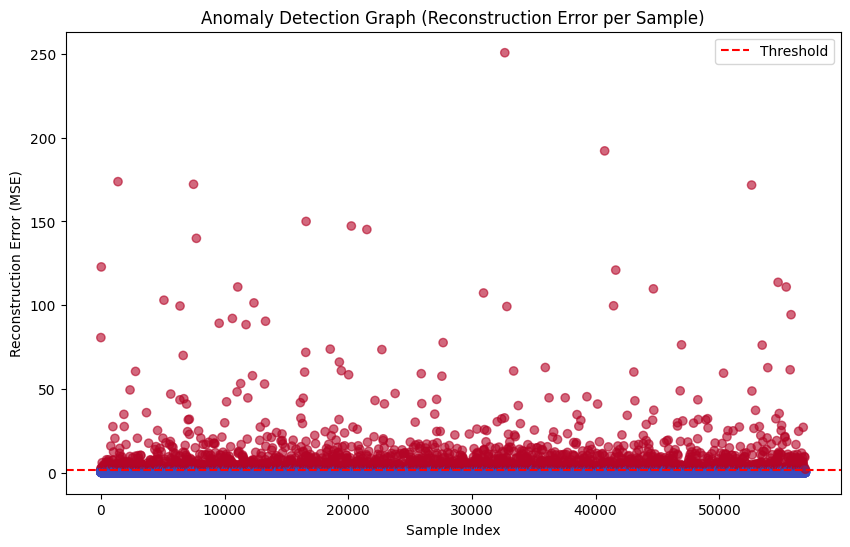

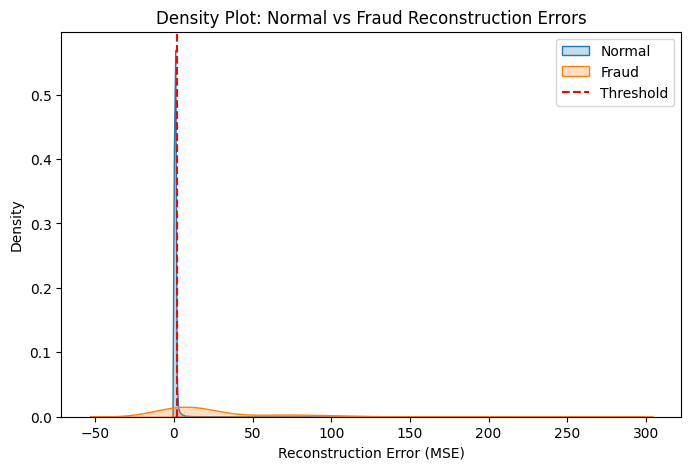

In [ ]:
# --------------------------------------------
# 🧠 Autoencoder for Anomaly (Fraud) Detection
# --------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ✅ 1. Load dataset (auto-download if missing)
file_path = "creditcard.csv"

if not os.path.exists(file_path):
    print("🔽 Downloading dataset...")
    url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
    data = pd.read_csv(url)
    data.to_csv(file_path, index=False)
else:
    print("✅ Found local dataset.")
    data = pd.read_csv(file_path)

print("Data Loaded. Shape:", data.shape)
print(data.head())

# ✅ 2. Preprocessing
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

X = data.drop('Class', axis=1)
y = data['Class'].astype(bool)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train only on normal data
X_train_norm = X_train[~y_train]
X_test_norm = X_test[~y_test]
X_test_fraud = X_test[y_test]

print(f"Training on normal samples: {len(X_train_norm)}")
print(f"Testing on normal samples: {len(X_test_norm)} | Fraud samples: {len(X_test_fraud)}")

# ✅ 3. Build Autoencoder
input_dim = X_train_norm.shape[1]
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(16, activation='relu')(input_layer)
encoder = tf.keras.layers.Dense(8, activation='relu')(encoder)
latent = tf.keras.layers.Dense(4, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(8, activation='relu')(latent)
decoder = tf.keras.layers.Dense(16, activation='relu')(decoder)
output_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
autoencoder.summary()

# ✅ 4. Train Autoencoder
history = autoencoder.fit(
    X_train_norm, X_train_norm,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_norm, X_test_norm),
    verbose=1
)

# ✅ 5. Reconstruction Error (Anomaly Detection)
recon = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - recon, 2), axis=1)

threshold = np.percentile(mse, 95)  # Top 5% errors as anomaly
y_pred = (mse > threshold).astype(int)

# ✅ 6. Visualization — Histogram of reconstruction error
plt.figure(figsize=(8, 5))
plt.hist(mse[y_test == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y_test == 1], bins=50, alpha=0.6, label='Fraud')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Histogram of Reconstruction Error")
plt.xlabel("Reconstruction error (MSE)")
plt.ylabel("Number of samples")
plt.legend()
plt.show()


# ✅ 8. Plot Training Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ✅ 9. Anomaly Detection Graph (NEW ADDITION)
# Scatter plot showing reconstruction error per sample
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mse)), mse, c=y_pred, cmap='coolwarm', alpha=0.6)
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Anomaly Detection Graph (Reconstruction Error per Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()
plt.show()

# ✅ 10. Show how fraud samples stand out
plt.figure(figsize=(8, 5))
sns.kdeplot(mse[y_test == 0], label="Normal", fill=True)
sns.kdeplot(mse[y_test == 1], label="Fraud", fill=True)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Density Plot: Normal vs Fraud Reconstruction Errors")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Density")
plt.legend()
plt.show()
